In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [38]:
# Define the signal function parameters
a = 20  # Frequency of first sine wave (in Hz)
b = 40  # Frequency of second sine wave (in Hz)
duration = 1.0  # seconds
t_high_res = np.linspace(0.0, duration, 1000, endpoint=False)  # High resolution time array

In [39]:
# Define F(t) = sin(at) + sin(bt)
F = np.sin(2 * np.pi * a * t_high_res) + np.sin(2 * np.pi * b * t_high_res)

Plotting of the original signal

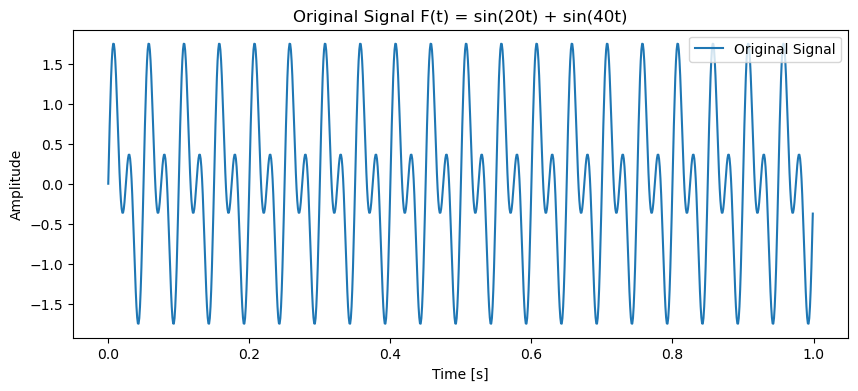

In [40]:
# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t_high_res, F, label="Original Signal")
plt.title("Original Signal F(t) = sin(20t) + sin(40t)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [41]:
# Define different sampling rates - 30 and 70 to show aliasing
sampling_rates = [30,70,80,100,200]  # in Hz

Aliasing at 30 Hz and 70 Hz 

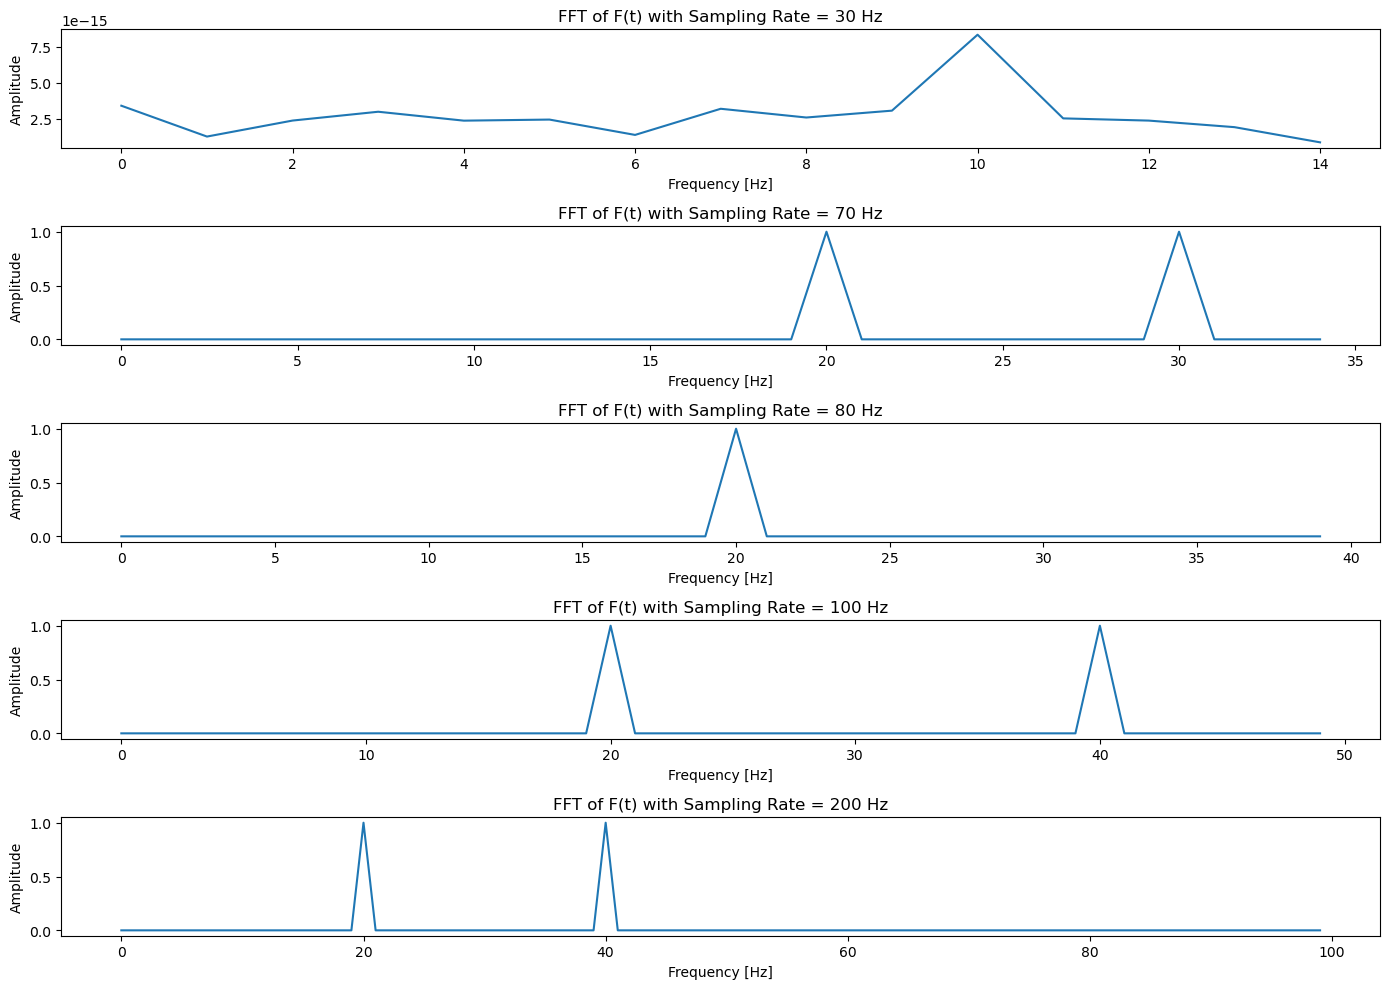

In [42]:

# Plot FFTs for different sampling rates
plt.figure(figsize=(14, 10))

for i, fs in enumerate(sampling_rates):
    t = np.linspace(0.0, duration, int(fs * duration), endpoint=False)  # Time array for sampling
    F_sampled = np.sin(2 * np.pi * a * t) + np.sin(2 * np.pi * b * t)
    
    # Perform FFT
    N = len(F_sampled)
    yf = fft(F_sampled)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    
    # Plot FFT result
    plt.subplot(5, 1, i + 1)
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
    plt.title(f"FFT of F(t) with Sampling Rate = {fs} Hz")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
